In [1]:
from sklearn.datasets import make_classification, make_blobs
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
def generate_dataset(n_features=2, n_informative=1, n_clusters=1, n_classes=2, random_state=42):
    """
    returns tuple object for the dataset
    """
    
    X, y = make_classification(n_features=n_features, 
                               n_redundant=0, 
                               n_classes=n_classes,
                               n_informative=n_informative, 
                               n_clusters_per_class=n_clusters, 
                               random_state=random_state)
    return (X, y)

def plot_dataset(ds):
    X, y = ds
    plt.scatter(X[:, 0], X[:, 1], c=y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

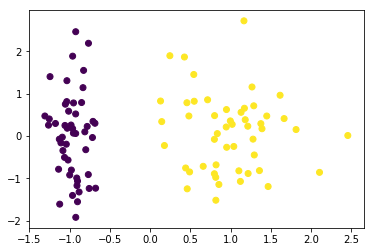

In [3]:
plot_dataset(generate_dataset())

#clf = MLPClassifier()  # this one doesn't converge
clf = MLPClassifier(solver='lbfgs')
#clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

(X, y) = generate_dataset()

clf.fit(X, y)


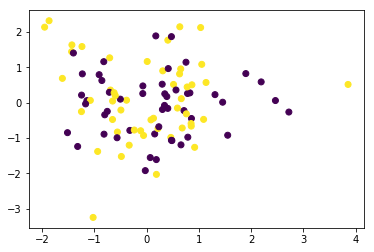

In [4]:
plot_dataset(generate_dataset(n_features=3))  # this is 3D data, only seeing 2dims

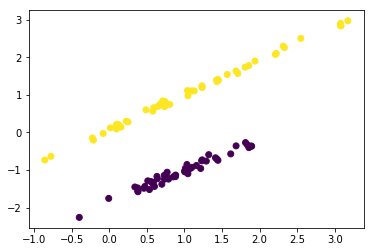

In [5]:
plot_dataset(generate_dataset(n_informative=2))


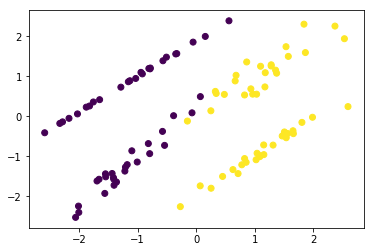

In [6]:
plot_dataset(generate_dataset(n_informative=2, n_clusters=2))

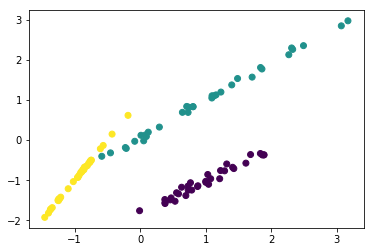

In [7]:
plot_dataset(generate_dataset(n_informative=2, n_classes=3))

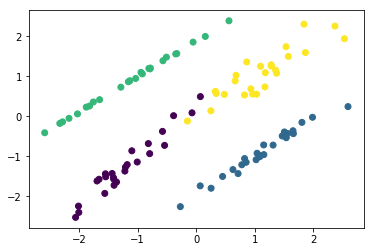

In [8]:
plot_dataset(generate_dataset(n_informative=2, n_classes=4))

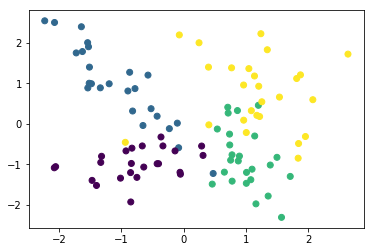

In [9]:
plot_dataset(generate_dataset(n_informative=2, n_classes=4, random_state=9989))

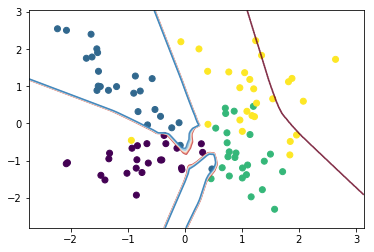

In [10]:
# build classifier model and train
clf = MLPClassifier(solver='lbfgs', alpha=1e-3)
(X, y) = generate_dataset(n_informative=2, n_classes=4, random_state=9989)

def generate_grid(X, h=0.01, boundary=0.5):
    """
    takes a 2d array with step size and returns a mesh grid
    """
    x_min, x_max = X[:, 0].min() - boundary, X[:, 0].max() + boundary
    y_min, y_max = X[:, 1].min() - boundary, X[:, 1].max() + boundary
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx, yy)


(xx, yy) = generate_grid(X)
clf.fit(X, y)
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
plt.contour(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y)


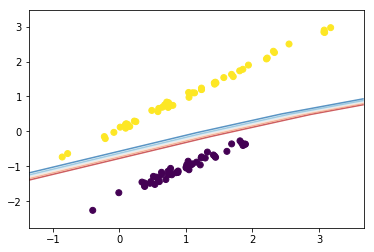

In [11]:
def plot_nn(ds):
    (X, y) = ds
    myclf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))
    (xx, yy) = generate_grid(X)
    myclf.fit(X, y)
    Z = myclf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y)

    
plot_nn(generate_dataset(n_informative=2))